In [ ]:
#Programmcode für den Projektentwurf für das Modul T3ELF3804.4
#Autor: Selina Domes
#Vorlage: https://github.com/schutera/DeepDive.git Zuletzt am gerufen am 02-01-2024

In [1]:
# Used libraries
import numpy as np
print('Numpy version:', np.__version__)
import matplotlib.pyplot as plt
import seaborn as sn
print('Seaborn version:', sn.__version__)
import pandas as pd
print('Pandas version:', pd.__version__)

import os
import time
import math

import tensorflow as tf        
print('Tensorflow version:', tf.__version__)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

Numpy version: 1.24.3
Seaborn version: 0.12.2
Pandas version: 2.0.3

Tensorflow version: 2.15.0


In [2]:
from tensorflow.keras.datasets import mnist

# Loading MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Printing the shape
print('x_train:', x_train.shape)
print('y_train:', y_train.shape)
print('x_test:', x_test.shape)
print('y_test:', y_test.shape)


x_train: (60000, 28, 28)
y_train: (60000,)
x_test: (10000, 28, 28)
y_test: (10000,)


In [3]:
# Change to 2-Dimension and Normilize the data - Interval [0,1], lineariesieren
x_train_N = x_train.reshape(-1, 28,28)/255.0
x_test_N = x_test.reshape(-1, 28,28)/255.0

x_train = x_train.reshape(60000, 784)/255.0
x_test = x_test.reshape(10000, 784)/255.0

# Printing the shape
print('x_train:', x_train.shape)
print('x_test:', x_test.shape)


x_train: (60000, 784)
x_test: (10000, 784)


In [4]:
from tensorflow.keras.utils import to_categorical

# One-hot encode - every images have an array with size of 10
y_train_OH = to_categorical(y_train, 10)
y_test_OH = to_categorical(y_test, 10)
print("y_train: ", y_train_OH.shape)
print("y_test: ", y_test_OH.shape)

y_train:  (60000, 10)
y_test:  (10000, 10)



 Plot of the first 25 samples in the MNIST training set


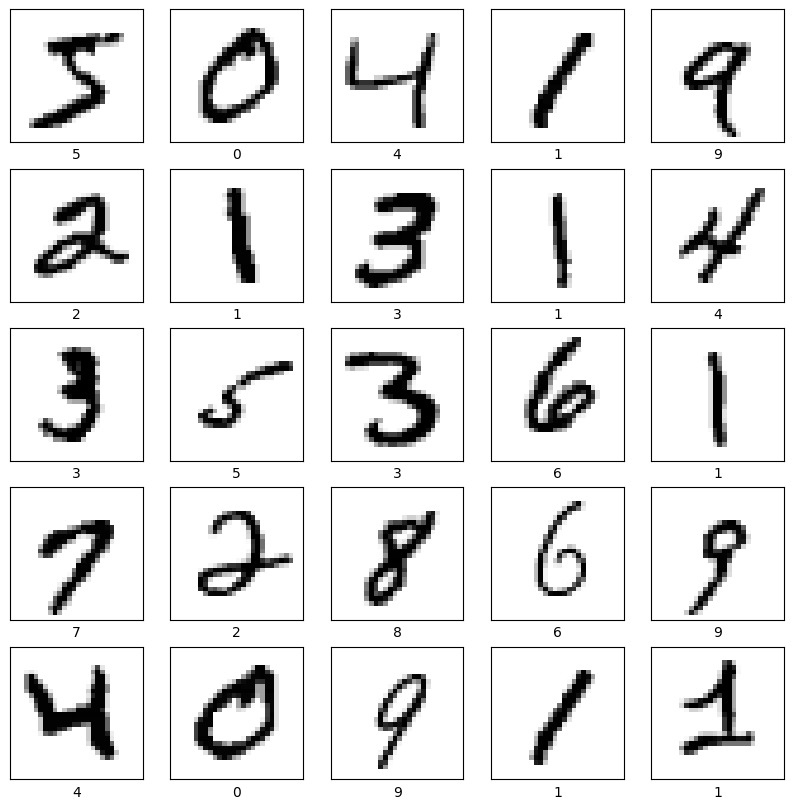

In [5]:
# Plotting data samples
print('\n Plot of the first 25 samples in the MNIST training set')
numbers_to_display = 25
num_cells = math.ceil(math.sqrt(numbers_to_display))
plt.figure(figsize=(10,10))
for i in range(numbers_to_display):
    plt.subplot(num_cells, num_cells, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train_N[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()

Im nächsten Schritt wird das Neurale Netz definert. Dabei gibt es verschiedene Methoden, das Netz aufzubauen, sowie die Parameter für die Neuronen und deren Interaktion zu setzen. 

Bisher wurde der Aufbau vom Notebook von Hr. Schhutera verwendet und um eine One-Hot-Encoder erweitert, damit für jedes mögliche Label eine seperaten Dimenson dargestellt wird und es möglich ist somit für die Wahrscheinlichkeit für 
jede Ziffer ausgegeben werden kann.

Damit die beste Mögliche Genauigkeit bei der geringesten Epoche und Batch Size erreicht werden kann 





In [6]:
# Define static values
EPOCHS = 30

optimizers = ['SGD', 'Adagrad', 'Adadelta', 'RMSprop', 'Adam', 'Nadam']
model_Arch = {'FFN':0, 'CNN':1}

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler

def architecture(i):
        if i == 0:
            # FFN Architeture
            model = Sequential()
            model.add(Dense(50, activation='sigmoid', input_shape=(784,)))
            model.add(Dense(123, activation='relu'))
            model.add(Dense(10, activation='softmax'))
            return model
            
        else:
            # CCN Architecture
            model = Sequential()
            model.add(Flatten(input_shape=(784,)))
            model.add(Dropout(0.2))
            model.add(Dense(128, 
                            input_shape=(784,), 
                            activation='relu'))
            model.add(Dense(10, activation='softmax'))
            return model


In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler

# Define the learning rate scheduler
def scheduler(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return lr * tf.math.exp(-0.1)

    
# Define the EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=2)

# Learningcurve diagram
def plot_learningCurve(history):
    # Plot training & validation accuracy values
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

    # Plot training & validation loss values
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

# Funktion for Training and Evalution
def process(optimizer, i):
    print(f'\n+++++++++++ {optimizer} ++++++++++')
    fnn_data = {} # save data
    fnn_data['title'] = (optimizer)
    #fnn_data['loss_t'] = (loss)
    if i == 0:
        fnn_data['model_t'] = ('FFN')
    else:
        fnn_data['model_t'] = ('CNN')
    
    # Define the model
    model = architecture(i)
    
    # Compile the model
    model.compile(optimizer=optimizer,
             loss='categorical_crossentropy',
             metrics=['accuracy'])

    # Training
    start_time = time.time()
    history = model.fit(x_train, 
                        y_train, 
                        epochs=EPOCHS,
                        batch_size=100,
                        #verbose=1,
                        validation_data=(x_test, y_test))
                        #callbacks=[early_stopping, LearningRateScheduler(scheduler)])
    
    #plot_learningCurve(history)
    
    fnn_data['history'] = history


    # Evaluate the training
    test = model.evaluate(x_test, y_test)
    fnn_data['test'] = test
    duration = time.time() - start_time 
    print(f'Dauer {duration:.2f} Sek | {EPOCHS} Epochen | Acc Val {test[1]:.3f}')
    return fnn_data

In [21]:
# Array with the solution
results = []

In [22]:
# Start training
for op in optimizers:
        for name, model in model_Arch.items():
            print(f'\n------------------ {name} ------------------')
            results.append(process(op,model))


------------------ FFN ------------------

+++++++++++ SGD ++++++++++
Epoch 1/30


ValueError: in user code:

    File "C:\Users\sd021\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\sd021\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\sd021\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\sd021\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1151, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "C:\Users\sd021\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1209, in compute_loss
        return self.compiled_loss(
    File "C:\Users\sd021\anaconda3\Lib\site-packages\keras\src\engine\compile_utils.py", line 277, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "C:\Users\sd021\anaconda3\Lib\site-packages\keras\src\losses.py", line 143, in __call__
        losses = call_fn(y_true, y_pred)
    File "C:\Users\sd021\anaconda3\Lib\site-packages\keras\src\losses.py", line 270, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "C:\Users\sd021\anaconda3\Lib\site-packages\keras\src\losses.py", line 2221, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "C:\Users\sd021\anaconda3\Lib\site-packages\keras\src\backend.py", line 5573, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (100, 1) and (100, 10) are incompatible


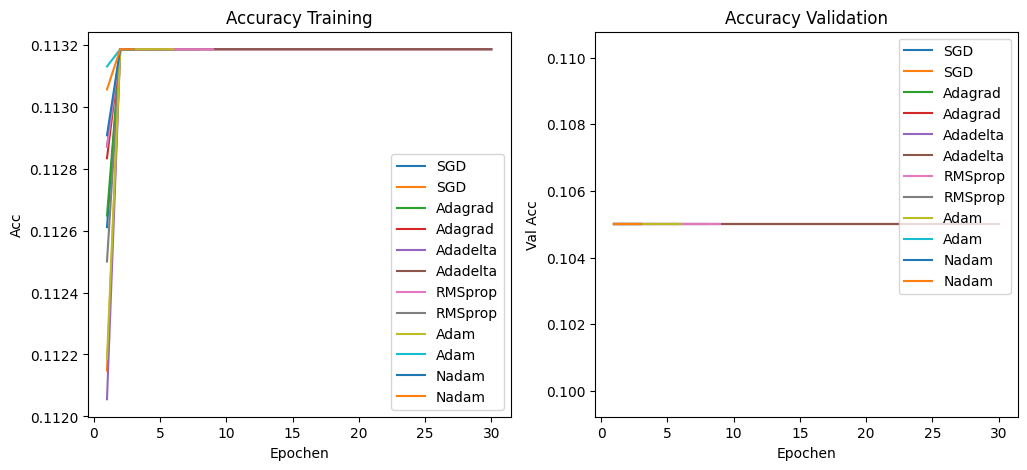

In [251]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

for res in results:
    ep = range(1, len(res['history'].history['acc'])+1 )
    ax[0].plot(ep, res['history'].history['acc'], label=res['title'])
    ax[0].set_ylabel('Acc')
    ax[0].set_xlabel('Epochen')
    ax[0].legend()
    ax[0].set_title('Accuracy Training')
    ax[0].grid()
    ax[1].plot(ep, res['history'].history['val_acc'], label=res['title'])
    ax[1].set_ylabel('Val Acc')
    ax[1].set_xlabel('Epochen')
    ax[1].grid()
    ax[1].set_title('Accuracy Validation')
    ax[1].legend()

plt.show()


In [256]:
for res in results:
    print("{:10} {:10}  training acc={:.4f}  val acc={:.4f}  test acc={:.4f}".
          format(str(res['title']),
                 str(res['model_t']),
                 res['history'].history['acc'][EPOCHS-1],
                 res['history'].history['val_acc'][EPOCHS-1],
                 res['test'][1]))

IndexError: list index out of range